# ![](https://julyedu-img-public.oss-cn-beijing.aliyuncs.com/Public/img/index/logo.png)

# Pandas教程

### 2019七月在线 机器学习集训营第八期 [@Julyedu.com七月在线 ](http://www.julyedu.com)
by 褚则伟 zeweichu@gmail.com

pandas是一个专门用于数据分析的python library

## [Pandas](http://pandas.pydata.org/)简介
- python数据分析library
- 基于numpy (对ndarray的操作)
- 有一种用python做Excel/SQL/R的感觉
- 为什么要学习pandas?
- pandas和机器学习的关系，数据预处理，feature engineering。
- 适合自学的[资料](http://pandas.pydata.org/pandas-docs/stable/)

## 目录
- numpy速成
- Series
- DataFrame
- Index
- 文件读写

## Numpy简介

- Numpy是Python语言的一个library [numpy](http://www.numpy.org/)
- Numpy主要支持矩阵操作和运算
- 现在比较流行的机器学习框架（例如Tensorflow/PyTorch等等），语法都与Numpy比较接近

### ndarray/数组

In [1]:
import numpy as np

In [2]:
!pip install numpy

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
[[1,2,3], [4,5,6]]

[[1, 2, 3], [4, 5, 6]]

In [5]:
a = np.array([[1,2,3], [4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

生成[0.0,1.0]之间的随机数

In [6]:
b = np.random.random((2,2))
b

array([[0.98970082, 0.65570599],
       [0.05130844, 0.25156886]])

In [7]:
print(a.shape)

(2, 3)


In [8]:
b.shape

(2, 2)

In [9]:
a.dtype

dtype('int64')

In [10]:
b.dtype

dtype('float64')

In [14]:
a = a.astype(b.dtype)
a.dtype

dtype('float64')

### Array indexing and slicing

In [17]:
a

array([[1., 2., 3.],
       [4., 5., 6.]])

In [18]:
a[0, 1]

2.0

In [19]:
[1,2,3,4,5,6][2:4]

[3, 4]

In [103]:
a[:,1:3].shape

(2, 2)

In [32]:
np.random.random

<function RandomState.random_sample>

In [30]:
p = np.random.random((3,4,5))
p.shape

(3, 4, 5)

In [39]:
p[1:3, 1:4:5, 2:4:2]

array([[[0.06271117]],

       [[0.07545525]]])

In [37]:
np.random.randn(4,5)

array([[ 2.00255026, -0.7110064 ,  0.04208712, -0.88342395,  0.03535541],
       [-0.89486365, -0.10243498, -0.52283882, -1.18035274,  1.06711195],
       [-0.42280861,  0.16112579,  0.17086151,  1.85671882,  1.14798128],
       [ 0.19731451,  0.34563909,  1.18219847, -0.60638889,  1.35882305]])

### boolean indexing

In [105]:
a > 2

array([[False, False, False],
       [False, False, False]])

In [27]:
a[a>2]

array([3., 4., 5., 6.])

In [28]:
a[a>2] = 0
a

array([[1., 2., 0.],
       [0., 0., 0.]])

### 数学运算

In [45]:
a

array([[1., 2., 0.],
       [0., 0., 0.]])

In [46]:
c = np.random.random((2,3))
c

array([[0.37853976, 0.5348264 , 0.28501098],
       [0.23542771, 0.95884883, 0.57023232]])

In [47]:
a + c

array([[1.37853976, 2.5348264 , 0.28501098],
       [0.23542771, 0.95884883, 0.57023232]])

In [48]:
a - c

array([[ 0.62146024,  1.4651736 , -0.28501098],
       [-0.23542771, -0.95884883, -0.57023232]])

In [49]:
a * c

array([[0.37853976, 1.0696528 , 0.        ],
       [0.        , 0.        , 0.        ]])

In [50]:
a / c

array([[2.6417304 , 3.73953117, 0.        ],
       [0.        , 0.        , 0.        ]])

### broadcasting

In [41]:
a + 2

array([[3., 4., 2.],
       [2., 2., 2.]])

In [42]:
c = np.random.random((1,3))
c

array([[0.20860804, 0.50153486, 0.06828541]])

In [43]:
a

array([[1., 2., 0.],
       [0., 0., 0.]])

In [44]:
a + c

array([[1.20860804, 2.50153486, 0.06828541],
       [0.20860804, 0.50153486, 0.06828541]])

In [51]:
g = np.random.randn(2,2,3)
g

array([[[ 0.42516698,  0.70456788,  0.69274577],
        [-0.05478545, -0.12794422, -0.79487346]],

       [[-1.61832595,  1.15918855, -0.12456767],
        [-0.30758643, -0.82884635, -1.28111779]]])

In [54]:
h = np.arange(3)
print(h.shape)
h

(3,)


array([0, 1, 2])

In [55]:
g + h

array([[[ 0.42516698,  1.70456788,  2.69274577],
        [-0.05478545,  0.87205578,  1.20512654]],

       [[-1.61832595,  2.15918855,  1.87543233],
        [-0.30758643,  0.17115365,  0.71888221]]])

- g: 2 * 2 * 3
- h: 1 * 1 * 3

- 1 \* 2 \* 2
- 4 \* 2 \* 2


1 * 3
2 * 2

- 1 \* 2
- 1 \* 4

In [57]:
np.random.randn(1,2) + np.random.randn(1,4)

ValueError: operands could not be broadcast together with shapes (1,2) (1,4) 

当操作两个array时，numpy会逐个dimension比较它们的shape，在下述情况下，两arrays会兼容和输出broadcasting结果：<br>

1. 相等
2. 其中一个为1，（进而可进行拷贝拓展已至，shape匹配）
3. 当两个ndarray的维度不完全相同的时候，rank较小的那个ndarray会被自动在前面加上一个一维维度，直到与另一个ndarray rank相同再检查是否匹配

比如求和的时候有：
```python
Image (3d array):  256 x 256 x 3
Scale (1d array):              3
Result (3d array): 256 x 256 x 3

A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5

A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4

A      (2d array):  15 x 3 x 5
B      (1d array):  15 x 1 x 5
Result (2d array):  15 x 3 x 5
```
![broadcasting](images/broadcasting.png)

In [62]:
np.arange(3)

array([0, 1, 2])

In [60]:
np.arange(3).reshape(3,1)

array([[0],
       [1],
       [2]])

In [61]:
np.arange(3).reshape(1,3)

array([[0, 1, 2]])

In [68]:
np.arange(6).reshape(2,3).T.reshape(2,3)

array([[0, 3, 1],
       [4, 2, 5]])

In [72]:
np.arange(6).reshape(3,-1,1,1,1)

array([[[[[0]]],


        [[[1]]]],



       [[[[2]]],


        [[[3]]]],



       [[[[4]]],


        [[[5]]]]])

In [58]:
np.random.randn(8) + np.random.randn(8,2,3)

ValueError: operands could not be broadcast together with shapes (8,) (8,2,3) 

### 更多数学运算

In [76]:
a + c

array([[1.37853976, 2.5348264 , 0.28501098],
       [0.23542771, 0.95884883, 0.57023232]])

In [78]:
np.arange(6,10,2)

array([6, 8])

In [80]:
a.sum()

3.0

In [106]:
np.std(a)

0.7637626158259734

In [83]:
a

array([[1., 2., 0.],
       [0., 0., 0.]])

In [82]:
np.sum(a, axis=0)

array([1., 2., 0.])

In [84]:
np.sum(a, axis=1)

array([3., 0.])

In [85]:
np.sum(a, axis=-1)

array([3., 0.])

In [87]:
p.shape

(3, 4, 5)

In [92]:
np.sum(p, 1, keepdims=True).shape

(3, 1, 5)

In [94]:
np.sum(p, 1) + p

ValueError: operands could not be broadcast together with shapes (3,5) (3,4,5) 

np.sum(p, 1, keepdims=True) + p

In [97]:
np.mean(a,axis=0)

array([0.5, 1. , 0. ])

In [98]:
b

array([[0.98970082, 0.65570599],
       [0.05130844, 0.25156886]])

In [99]:
a

array([[1., 2., 0.],
       [0., 0., 0.]])

In [100]:
b.dot(a)

array([[0.98970082, 1.97940164, 0.        ],
       [0.05130844, 0.10261688, 0.        ]])

In [101]:
np.matmul(b, a) #matrix multiplication

array([[0.98970082, 1.97940164, 0.        ],
       [0.05130844, 0.10261688, 0.        ]])

[更多阅读](http://cs231n.github.io/python-numpy-tutorial/)

## Pandas数据结构Series

### 2019七月在线 机器学习集训营第八期 julyedu.com

In [107]:
import pandas as pd

### 构造和初始化Series

Series是一个一维的数据结构，下面是一些初始化Series的方法。

In [108]:
s = pd.Series([7, "Beijing", 323.34, -124, "Happy"])
s

0          7
1    Beijing
2     323.34
3       -124
4      Happy
dtype: object

In [109]:
type(s)

pandas.core.series.Series

pandas会默认用0到n-1来作为Series的index，但是我们也可以自己指定index。index我们可以把它理解为dict里面的key。

In [111]:
list("ABCDE")

['A', 'B', 'C', 'D', 'E']

In [112]:
s = pd.Series([7, "Beijing", 323.34, -124, "Happy"],
             index=list("ABCDE"))
s

A          7
B    Beijing
C     323.34
D       -124
E      Happy
dtype: object

还可以用dictionary来构造一个Series，因为Series本来就是key value pairs。

In [114]:
cities = {'Beijing': 55000, 'Shanghai': 60000, 'Shenzhen': 60000, \
          'Hangzhou': 30000, 'Guangzhou': 35000, 'Suzhou': None}
apts = pd.Series(cities, name="price")
apts

Beijing      55000.0
Shanghai     60000.0
Shenzhen     60000.0
Hangzhou     30000.0
Guangzhou    35000.0
Suzhou           NaN
Name: price, dtype: float64

numpy ndarray构建一个Series

In [116]:
s = pd.Series(np.random.randn(5), index=list("abcde"))
s

a   -0.975521
b    1.038560
c    0.781208
d   -1.102047
e    1.026240
dtype: float64

In [118]:
s.astype(np.int)

a    0
b    1
c    0
d   -1
e    1
dtype: int64

In [145]:
np.random.randint(3,5, size=(3,4))

array([[4, 4, 3, 3],
       [4, 4, 3, 4],
       [3, 4, 3, 4]])

### 选择数据

我们可以像对待一个list一样对待Series

In [150]:
apts["Guangzhou"]

35000.0

In [151]:
apts[[4,3,1]]

Guangzhou    35000.0
Hangzhou     30000.0
Shanghai     60000.0
Name: price, dtype: float64

In [152]:
apts[["Guangzhou", "Hangzhou", "Shanghai"]]

Guangzhou    35000.0
Hangzhou     30000.0
Shanghai     60000.0
Name: price, dtype: float64

In [153]:
apts[1:]

Shanghai     60000.0
Shenzhen     60000.0
Hangzhou     30000.0
Guangzhou    35000.0
Suzhou           NaN
Name: price, dtype: float64

In [154]:
apts[:-1]

Beijing      55000.0
Shanghai     60000.0
Shenzhen     60000.0
Hangzhou     30000.0
Guangzhou    35000.0
Name: price, dtype: float64

为什么下面这样会拿到两个NaN呢？

In [155]:
apts[1:] + apts[:-1]

Beijing           NaN
Guangzhou     70000.0
Hangzhou      60000.0
Shanghai     120000.0
Shenzhen     120000.0
Suzhou            NaN
Name: price, dtype: float64

Series就像一个dict，前面定义的index就是用来选择数据的

In [157]:
"Chongqing" in apts

False

比较安全的用key读取value的方法如下

In [158]:
apts.get("Chongqing", 0)

0

In [160]:
# apts["Chongqing"]

下面这种写法，如果key不存在，就可能会报错了

boolean indexing，与numpy类似。

In [162]:
less_than_50000 = apts < 50000

In [163]:
apts[less_than_50000]

Hangzhou     30000.0
Guangzhou    35000.0
Name: price, dtype: float64

In [164]:
apts.median()

55000.0

In [165]:
apts.mean()

48000.0

In [166]:
apts.std()

14404.860290887933

In [167]:
apts.describe()

count        5.000000
mean     48000.000000
std      14404.860291
min      30000.000000
25%      35000.000000
50%      55000.000000
75%      60000.000000
max      60000.000000
Name: price, dtype: float64

In [168]:
apts[apts > apts.median()]

Shanghai    60000.0
Shenzhen    60000.0
Name: price, dtype: float64

### Series元素赋值

Series的元素可以被赋值

In [170]:
print(apts["Shenzhen"])
apts["Shenzhen"] = 61000
print(apts["Shenzhen"])

60000.0
61000.0


前面讲过的boolean indexing在赋值的时候也可以用

In [171]:
print(apts[apts < 50000])
print()
apts[apts < 50000] = 40000
print(apts[apts < 50000])

Hangzhou     30000.0
Guangzhou    35000.0
Name: price, dtype: float64

Hangzhou     40000.0
Guangzhou    40000.0
Name: price, dtype: float64


In [174]:
apts.values

array([55000., 60000., 61000., 40000., 40000.,    nan])

In [175]:
pd.Series(np.arange(6))

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

In [178]:
apts.keys()

Index(['Beijing', 'Shanghai', 'Shenzhen', 'Hangzhou', 'Guangzhou', 'Suzhou'], dtype='object')

### 数学运算

下面我们来讲一些基本的数学运算。

In [179]:
apts/2

Beijing      27500.0
Shanghai     30000.0
Shenzhen     30500.0
Hangzhou     20000.0
Guangzhou    20000.0
Suzhou           NaN
Name: price, dtype: float64

In [180]:
apts*2

Beijing      110000.0
Shanghai     120000.0
Shenzhen     122000.0
Hangzhou      80000.0
Guangzhou     80000.0
Suzhou            NaN
Name: price, dtype: float64

In [181]:
np.square(apts)

Beijing      3.025000e+09
Shanghai     3.600000e+09
Shenzhen     3.721000e+09
Hangzhou     1.600000e+09
Guangzhou    1.600000e+09
Suzhou                NaN
Name: price, dtype: float64

In [182]:
np.sqrt(apts)

Beijing      234.520788
Shanghai     244.948974
Shenzhen     246.981781
Hangzhou     200.000000
Guangzhou    200.000000
Suzhou              NaN
Name: price, dtype: float64

numpy的运算可以被运用到pandas上去

我们再定义一个新的Series做加法

In [183]:
cars = pd.Series({'Beijing': 300000, 'Shanghai': 400000, 'Shenzhen': 300000, \
                      'Tianjin': 200000, 'Guangzhou': 200000, 'Chongqing': 150000})
cars

Beijing      300000
Shanghai     400000
Shenzhen     300000
Tianjin      200000
Guangzhou    200000
Chongqing    150000
dtype: int64

In [184]:
apts * 100 + cars

Beijing      5800000.0
Chongqing          NaN
Guangzhou    4200000.0
Hangzhou           NaN
Shanghai     6400000.0
Shenzhen     6400000.0
Suzhou             NaN
Tianjin            NaN
dtype: float64

## 数据结构[Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

### 七月在线 julyedu.com

一个Dataframe就是一张表格，Series表示的是一维数组，Dataframe则是一个二维数组，可以类比成一张excel的spreadsheet。也可以把Dataframe当做一组Series的集合。

In [253]:
data = {'city': ['Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Hangzhou', 'Chongqing'],
       'year': [2018,2019,2018,2019,2018, 2018],
       'population': [2100, 2300, 1000, 700, 500, 500]}

In [254]:
frame = pd.DataFrame(data, columns=["year", "city", "population"],
                    index=["one", "two", "three", "four", "five", "six"])
frame 

,year,city,population
one,2018,Beijing,2100
two,2019,Shanghai,2300
three,2018,Guangzhou,1000
four,2019,Shenzhen,700
five,2018,Hangzhou,500
six,2018,Chongqing,500


### 创建一个DataFrame

dataframe可以由一个dictionary构造得到。

columns的名字和顺序可以指定

也可以从几个Series构建一个DataFrame

In [198]:
apts

Beijing      55000.0
Shanghai     60000.0
Shenzhen     61000.0
Hangzhou     40000.0
Guangzhou    40000.0
Suzhou           NaN
Name: price, dtype: float64

In [199]:
cars

Beijing      300000
Shanghai     400000
Shenzhen     300000
Tianjin      200000
Guangzhou    200000
Chongqing    150000
dtype: int64

In [200]:
df = pd.DataFrame({"apts": apts, "cars": cars})
df

,apts,cars
Beijing,55000.0,300000.0
Chongqing,NaN,150000.0
Guangzhou,40000.0,200000.0
Hangzhou,40000.0,NaN
Shanghai,60000.0,400000.0
Shenzhen,61000.0,300000.0
Suzhou,NaN,NaN
Tianjin,NaN,200000.0


In [201]:
df.T

,Beijing,Chongqing,Guangzhou,Hangzhou,Shanghai,Shenzhen,Suzhou,Tianjin
apts,55000.0,NaN,40000.0,40000.0,60000.0,61000.0,NaN,NaN
cars,300000.0,150000.0,200000.0,NaN,400000.0,300000.0,NaN,200000.0


也可以用一个list of dicts来构建DataFrame

In [208]:
data = [{"July": 999999, "Han": 50000, "Zewei": 1000, "Sun": 99999}, \
        {"July": 99999, "Han": 8000, "Zewei": 200}]
tmp = pd.DataFrame(data, index=["salary", "bonus"])

In [209]:
tmp["Sun"]

salary    99999.0
bonus         NaN
Name: Sun, dtype: float64

loc方法可以拿到行

In [211]:
df["apts"]

Beijing      55000.0
Chongqing        NaN
Guangzhou    40000.0
Hangzhou     40000.0
Shanghai     60000.0
Shenzhen     61000.0
Suzhou           NaN
Tianjin          NaN
Name: apts, dtype: float64

In [212]:
df["total_cost"] = df["apts"] * 100 + df["cars"]
df

,apts,cars,total_cost
Beijing,55000.0,300000.0,5800000.0
Chongqing,NaN,150000.0,NaN
Guangzhou,40000.0,200000.0,4200000.0
Hangzhou,40000.0,NaN,NaN
Shanghai,60000.0,400000.0,6400000.0
Shenzhen,61000.0,300000.0,6400000.0
Suzhou,NaN,NaN,NaN
Tianjin,NaN,200000.0,NaN


In [215]:
type(frame["city"])

pandas.core.series.Series

In [216]:
frame.city

one        Beijing
two       Shanghai
three    Guangzhou
four      Shenzhen
five      Hangzhou
six      Chongqing
Name: city, dtype: object

In [219]:
frame.loc["one"]

year             2018
city          Beijing
population       2100
Name: one, dtype: object

In [229]:
type(frame.loc["one"])

pandas.core.series.Series

下面这种方法默认用来选列而不是选行

iloc方法可以拿到行和列，把pandas dataframe当做numpy的ndarray来操作

In [222]:
frame.values[1:3, 1:3]

array([['Shanghai', 2300],
       ['Guangzhou', 1000]], dtype=object)

In [226]:
frame.iloc[2:5, 1:3]

,city,population
three,Guangzhou,1000
four,Shenzhen,700
five,Hangzhou,500


In [232]:
frame

,year,city,population
one,2018,Beijing,2100
two,2019,Shanghai,2300
three,2018,Guangzhou,1000
four,2019,Shenzhen,700
five,2018,Hangzhou,500
six,2018,Chongqing,500


### DataFrame元素赋值

In [235]:
frame.at["one", "population"] = 2400
frame

,year,city,population
one,2018,Beijing,2400
two,2019,Shanghai,2300
three,2018,Guangzhou,1000
four,2019,Shenzhen,700
five,2018,Hangzhou,500
six,2018,Chongqing,500


In [236]:
frame.loc["one", "population"] = 2000
frame

,year,city,population
one,2018,Beijing,2000
two,2019,Shanghai,2300
three,2018,Guangzhou,1000
four,2019,Shenzhen,700
five,2018,Hangzhou,500
six,2018,Chongqing,500


可以给一整列赋值

In [237]:
frame["debt"] = 100

In [255]:
frame["debt"] = np.arange(6) * 100
frame

,year,city,population,debt
one,2018,Beijing,2100,0
two,2019,Shanghai,2300,100
three,2018,Guangzhou,1000,200
four,2019,Shenzhen,700,300
five,2018,Hangzhou,500,400
six,2018,Chongqing,500,500


In [242]:
frame["debt"] = pd.Series(np.arange(6) * 100, index=frame.index)
frame

,year,city,population,debt
one,2018,Beijing,2000,0
two,2019,Shanghai,2300,100
three,2018,Guangzhou,1000,200
four,2019,Shenzhen,700,300
five,2018,Hangzhou,500,400
six,2018,Chongqing,500,500


In [241]:
pd.Series(np.arange(6) * 100)

0      0
1    100
2    200
3    300
4    400
5    500
dtype: int64

In [246]:
frame.iloc[::2,::2]

,year,population
one,2018,2000
three,2018,1000
five,2018,500


还可以用Series来指定需要修改的index以及相对应的value，没有指定的默认用NaN.

In [248]:
val = pd.Series([100, 200, 300], index=['two', 'three', 'five'])
val

two      100
three    200
five     300
dtype: int64

In [250]:
frame["debt"] = val
frame

,year,city,population,debt
one,2018,Beijing,2000,NaN
two,2019,Shanghai,2300,100.0
three,2018,Guangzhou,1000,200.0
four,2019,Shenzhen,700,NaN
five,2018,Hangzhou,500,300.0
six,2018,Chongqing,500,NaN


In [256]:
frame.city == "Chongqing"

one      False
two      False
three    False
four     False
five     False
six       True
Name: city, dtype: bool

In [257]:
frame.loc[frame.city == "Chongqing"]

,year,city,population,debt
six,2018,Chongqing,500,500


In [258]:
frame["western"] = frame.city == "Chongqing"
frame

,year,city,population,debt,western
one,2018,Beijing,2100,0,False
two,2019,Shanghai,2300,100,False
three,2018,Guangzhou,1000,200,False
four,2019,Shenzhen,700,300,False
five,2018,Hangzhou,500,400,False
six,2018,Chongqing,500,500,True


如果我们想要知道有哪些列，直接用columns

In [260]:
frame.columns

Index(['year', 'city', 'population', 'debt', 'western'], dtype='object')

行的话就叫做index啦

In [261]:
frame.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

In [264]:
df.loc[df["total_cost"] > 5000000]

,apts,cars,total_cost
Beijing,55000.0,300000.0,5800000.0
Shanghai,60000.0,400000.0,6400000.0
Shenzhen,61000.0,300000.0,6400000.0


In [266]:
df.loc["Beijing"]

apts            55000.0
cars           300000.0
total_cost    5800000.0
Name: Beijing, dtype: float64

In [267]:
df.loc["Beijing"] += pd.Series({"apts": 10000, "cars": 100, "total_cost":10100})
df

,apts,cars,total_cost
Beijing,65000.0,300100.0,5810100.0
Chongqing,NaN,150000.0,NaN
Guangzhou,40000.0,200000.0,4200000.0
Hangzhou,40000.0,NaN,NaN
Shanghai,60000.0,400000.0,6400000.0
Shenzhen,61000.0,300000.0,6400000.0
Suzhou,NaN,NaN,NaN
Tianjin,NaN,200000.0,NaN


一个DataFrame就和一个numpy 2d array一样，可以被转置

In [268]:
frame.T

,one,two,three,four,five,six
year,2018,2019,2018,2019,2018,2018
city,Beijing,Shanghai,Guangzhou,Shenzhen,Hangzhou,Chongqing
population,2100,2300,1000,700,500,500
debt,0,100,200,300,400,500
western,False,False,False,False,False,True


我们还可以指定index的名字和列的名字

In [270]:
frame.index.name = "index"
frame.columns.name = "information"
frame

information,year,city,population,debt,western
index,,,,,
one,2018,Beijing,2100,0,False
two,2019,Shanghai,2300,100,False
three,2018,Guangzhou,1000,200,False
four,2019,Shenzhen,700,300,False
five,2018,Hangzhou,500,400,False
six,2018,Chongqing,500,500,True


## csv文件读写

In [276]:
pokemon = pd.read_csv("data/Pokemon.csv", index_col=[0])
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [273]:
pokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


- [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [to_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)

### 数据缺失

[reference](https://pandas.pydata.org/pandas-docs/stable/missing_data.html)

In [278]:
pokemon.head(20)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [283]:
pokemon.loc[pokemon["Type 2"].isnull(), "Type 2"] = pokemon.loc[pokemon["Type 2"].isnull(), "Type 1"]

In [285]:
pokemon.head(20)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [287]:
apts.notnull()

Beijing       True
Shanghai      True
Shenzhen      True
Hangzhou      True
Guangzhou     True
Suzhou       False
Name: price, dtype: bool

In [288]:
apts.isnull()

Beijing      False
Shanghai     False
Shenzhen     False
Hangzhou     False
Guangzhou    False
Suzhou        True
Name: price, dtype: bool

In [290]:
apts[apts.isnull() == False]

Beijing      55000.0
Shanghai     60000.0
Shenzhen     61000.0
Hangzhou     40000.0
Guangzhou    40000.0
Name: price, dtype: float64

用to_csv方法写出到文件

In [291]:
df = pd.DataFrame(np.random.rand(10, 4), columns=list("abcd"))
df

,a,b,c,d
0,0.266817,0.480667,0.368461,0.913927
1,0.297561,0.562286,0.629651,0.528569
2,0.168200,0.184519,0.450510,0.587548
3,0.195284,0.702352,0.106502,0.628850
4,0.681474,0.281177,0.120736,0.027026
5,0.531402,0.454087,0.343632,0.140917
6,0.392875,0.812774,0.501362,0.896960
7,0.312948,0.830607,0.135465,0.200779
8,0.627289,0.506945,0.745857,0.718568
9,0.927840,0.598459,0.806875,0.178656


In [293]:
df.to_csv("data/samples.tsv", sep="\t")

## Index
### 2019七月在线 机器学习集训营第八期  julyedu.com

### index object

In [294]:
obj = pd.Series(range(3), index = ['a', 'b', 'c'])

In [295]:
obj

a    0
b    1
c    2
dtype: int64

In [297]:
obj.index[1:]

Index(['b', 'c'], dtype='object')

index的值是不能被更改的

In [299]:
obj.index[1] = "d"

TypeError: Index does not support mutable operations

### 针对index进行索引和切片

默认的数字index依旧可以使用

In [301]:
obj[1:3]

b    1
c    2
dtype: int64

下面介绍如何对Series进行切片

In [302]:
obj["b":"c"]

b    1
c    2
dtype: int64

对DataFrame进行Indexing与Series基本相同

In [307]:
frame[:2]

information,year,city,population,debt,western
index,,,,,
one,2018,Beijing,2100,0,False
two,2019,Shanghai,2300,100,False


In [310]:
frame.loc[["two", "four"], ["city", "population"]]

information,city,population
index,,
two,Shanghai,2300
four,Shenzhen,700


In [311]:
frame.loc[:"four", "city"]

index
one        Beijing
two       Shanghai
three    Guangzhou
four      Shenzhen
Name: city, dtype: object

### [reindex](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html)

把一个Series或者DataFrame按照新的index顺序进行重排

In [312]:
obj = pd.Series([4.5, 7.2, -5.3, 3.2], index=['d', 'b', 'a', 'c'])

In [315]:
obj.reindex(list("abcde"), fill_value=0)

a   -5.3
b    7.2
c    3.2
d    4.5
e    0.0
dtype: float64

In [316]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index = [0,2,4])
obj3

0      blue
2    purple
4    yellow
dtype: object

如果我们reindex的index长度比原来的index长，可以指定方法来fill NaN

In [320]:
obj3.reindex(range(6), method="ffill")

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [321]:
obj3.reindex(range(6), method="bfill")

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

既然我们可以对Series进行reindex，相应地，我们也可以用同样的方法对DataFrame进行reindex。

In [324]:
frame.reindex(columns=['city', 'year', 'population', "western", "debt"],
             index=["one", "two", "three"])

information,city,year,population,western,debt
index,,,,,
one,Beijing,2018,2100,False,0
two,Shanghai,2019,2300,False,100
three,Guangzhou,2018,1000,False,200


在reindex的同时，我们还可以重新指定columns

下面介绍如何用drop来删除Series和DataFrame中的index，注意drop的效果不是in place的，也就是说他会返回一个object，原来的Obejct并没有被改变

In [327]:
obj3.drop([2,4])

0    blue
dtype: object

In [328]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [330]:
frame.drop("one")

information,year,city,population,debt,western
index,,,,,
two,2019,Shanghai,2300,100,False
three,2018,Guangzhou,1000,200,False
four,2019,Shenzhen,700,300,False
five,2018,Hangzhou,500,400,False
six,2018,Chongqing,500,500,True


In [332]:
frame.drop("western", axis=1)

information,year,city,population,debt
index,,,,
one,2018,Beijing,2100,0
two,2019,Shanghai,2300,100
three,2018,Guangzhou,1000,200
four,2019,Shenzhen,700,300
five,2018,Hangzhou,500,400
six,2018,Chongqing,500,500


drop不仅仅可以删除行，还可以删除列

In [336]:
obj4 = pd.Series([4.5, 7.2, -5.3, 3.2], index=['d', 'b', 'a', 'c'])
obj4

d    4.5
b    7.2
a   -5.3
c    3.2
dtype: float64

In [337]:
obj4.index = list("abcd")
obj4

a    4.5
b    7.2
c   -5.3
d    3.2
dtype: float64

### 总结练习
### 2018七月在线 机器学习集训营第六期 julyedu.com
by 褚则伟 zeweichu@gmail.com

In [338]:
goog = pd.read_csv("data/GOOG.csv")
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [342]:
goog = pd.read_csv("data/GOOG.csv", index_col="Date", parse_dates=["Date"])
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


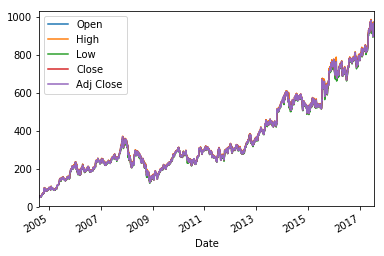

In [345]:
%matplotlib inline
goog[["Open", "High", "Low", "Close","Adj Close"]].plot()

In [346]:
a = np.random.rand(1000, 5000)
b = np.random.rand(5000, 10000)
a.dot(b)

array([[1252.09611676, 1229.6594136 , 1224.00438374, ..., 1234.13899739,
        1228.2837529 , 1223.49333804],
       [1242.07087371, 1217.63762849, 1215.17172003, ..., 1228.66230385,
        1213.97701628, 1224.39973015],
       [1233.44013273, 1205.91219384, 1211.48877024, ..., 1211.86550406,
        1194.52436898, 1201.6626744 ],
       ...,
       [1225.71309588, 1204.8226887 , 1208.91151869, ..., 1216.41439355,
        1195.60780267, 1200.47494446],
       [1267.23269273, 1239.40859385, 1228.5722441 , ..., 1247.17927537,
        1231.2024168 , 1235.51011705],
       [1269.01859967, 1250.80375884, 1236.43244611, ..., 1257.87807765,
        1244.32722609, 1256.92498652]])

In [ ]:
c = np.zeros((1000, 10000))
for i in range(a.shape[0]):
    for j in range(b.shape[1]):
        for k in range(a.shape[1]):
            c[i,j] = a[i,k] * b[k, j]
